# Core references

- [The Basics of Neural Networks](https://towardsdatascience.com/the-basics-of-neural-networks-neural-network-series-part-1-4419e343b2b)
- [How Neural Network Works - with Worked Example](https://towardsdatascience.com/feed-forward-neural-network-with-example-neural-network-series-part-2-eeca7a081ef5)
- [How Neural Networks Actually Work - Python Implementation (Simplified)](https://towardsdatascience.com/how-neural-networks-actually-work-python-implementation-simplified-a1167b4f54fe)
- [How Neural Networks Actually Work - Python Implementation Part 2 (Simplified)](https://towardsdatascience.com/how-neural-networks-actually-work-python-implementation-part-2-simplified-80db0351db45)
- [How Does Back-Propagation Work in Neural Networks? (the mathematical underpinnings)](https://towardsdatascience.com/how-does-back-propagation-work-in-neural-networks-with-worked-example-bc59dfb97f48)

# Data and the Architecture

The data used can be found [here](https://kipronokoech.github.io/datasets/marks.csv) or within the repo.

We used 3-4-1 NN.

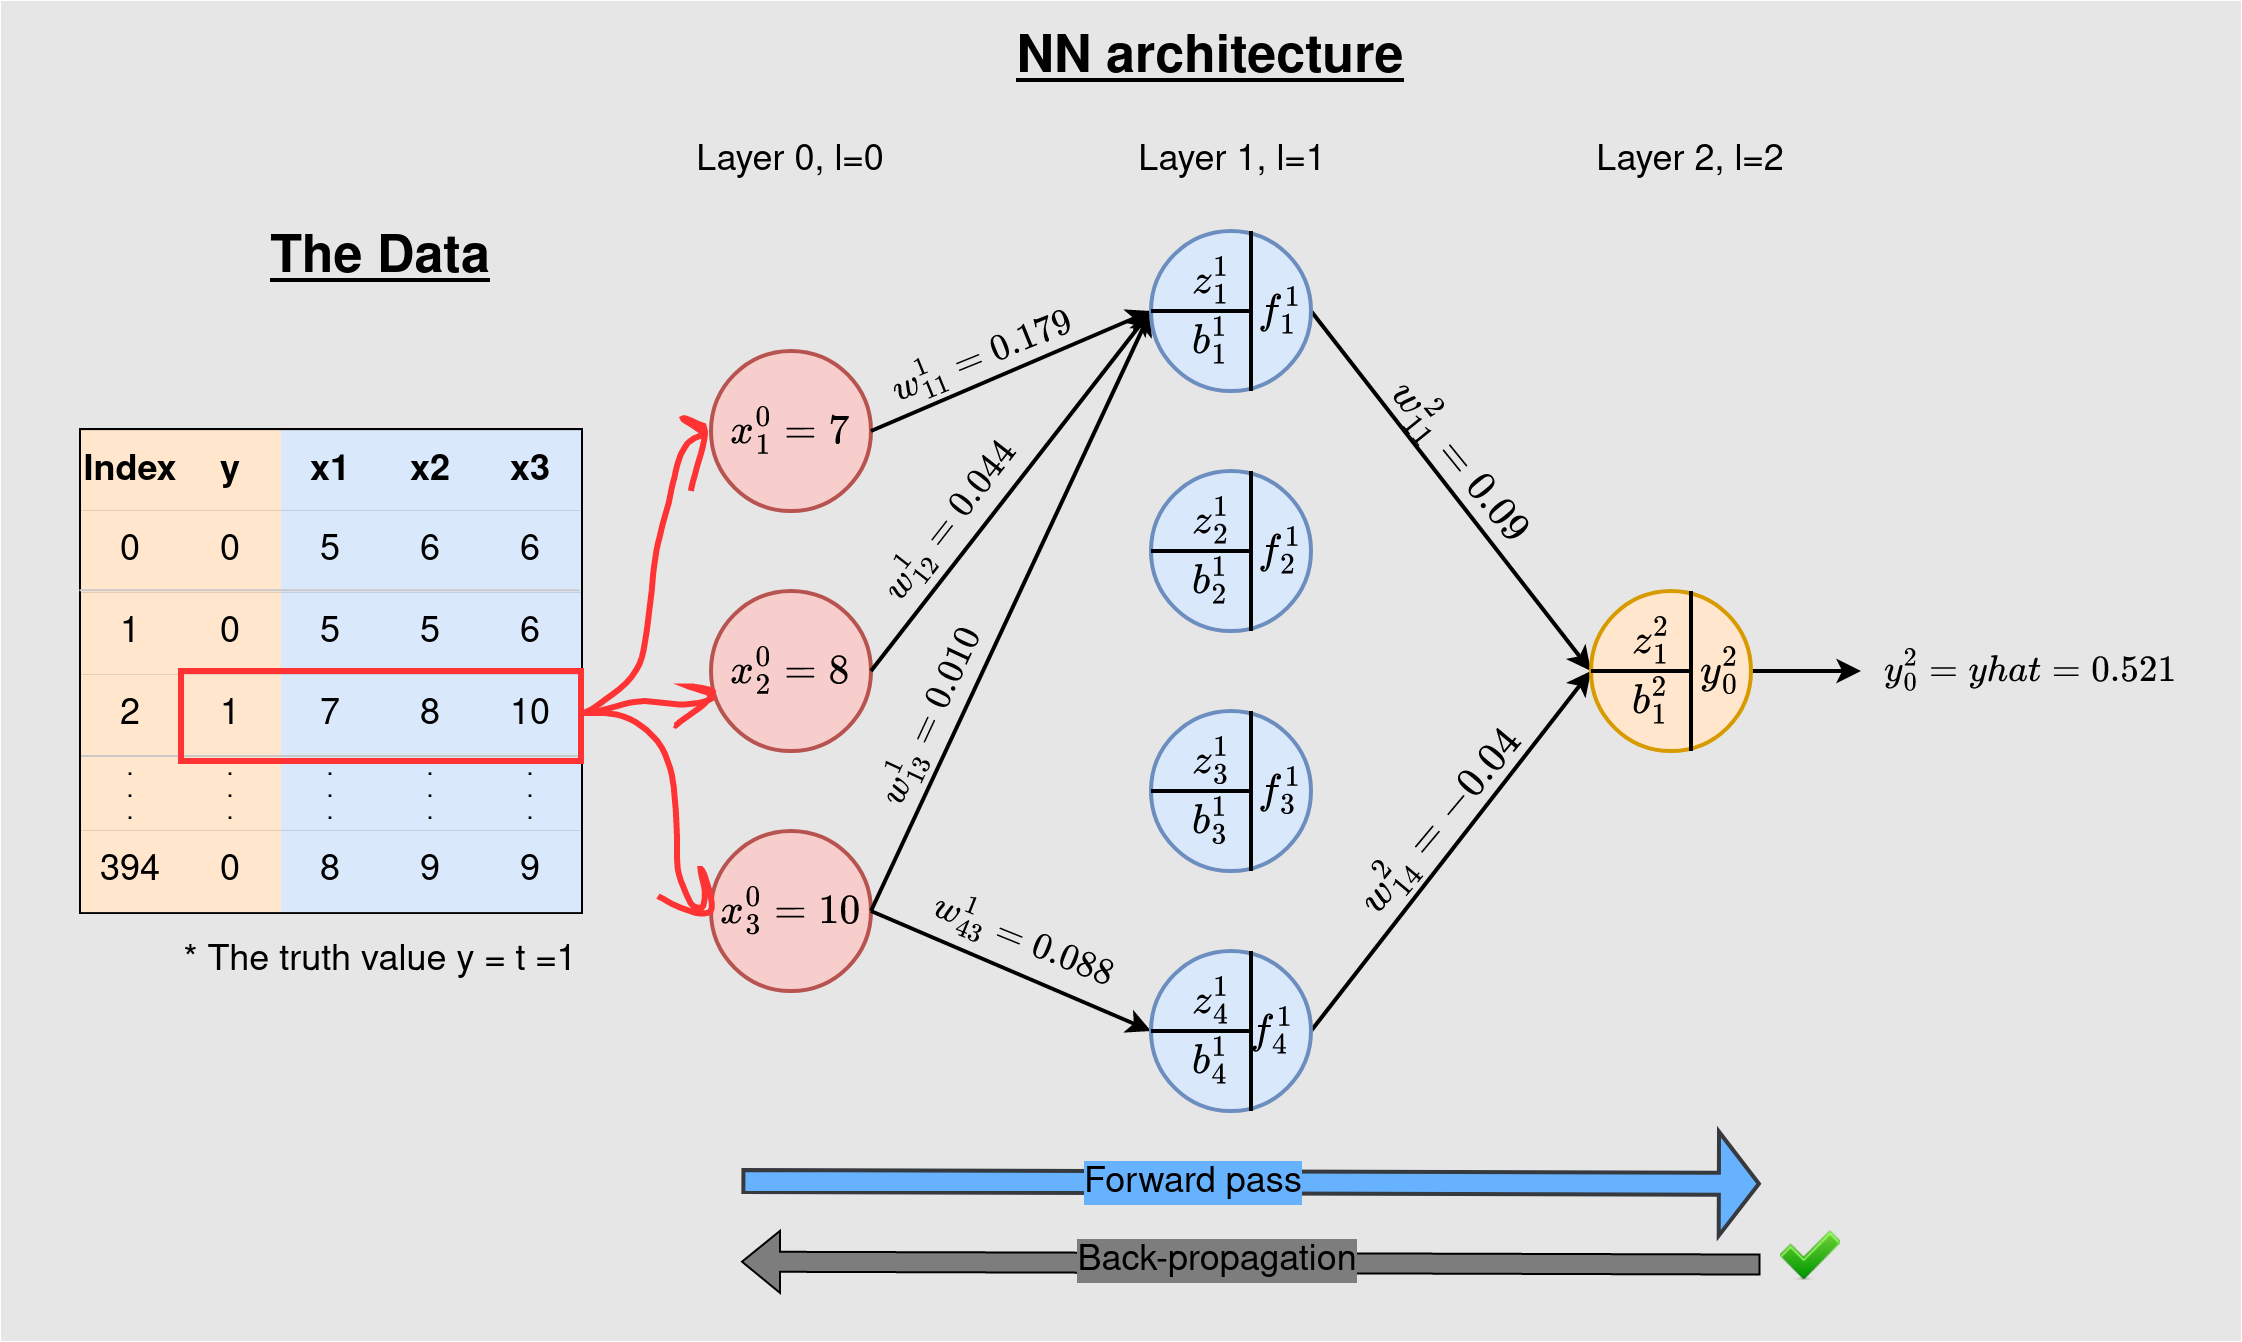

# Initial Parameters

- The parameters shown in the Figure below are generated with the code in this Notebook.

![page7-input-hidden%20data.png](./images/page7_input_hidden_data.png)

# Neural Networks from scratch

In [9]:
# import necessary packages
import pandas as pd
from copy import deepcopy as copy
import numpy as np
from sklearn.metrics import accuracy_score

# set the precision of numpy output to 3
np.set_printoptions(precision=3)


class OurNeuralNet(object):
    def __init__(self, X, y, layers, m, learning_rate=0.01, factor=0.01):
        """
        Our init values - X (the input), y (target values), m (number of examples),
        learning_rate, factor (determines how small the parameters are)
        """
        self.X = X
        self.layers = layers
        self.y = y 
        self.learning_rate=learning_rate
        self.factor = factor
        self.m = m
    @staticmethod
    def sigmoid(x):
        """
        Argument: value(s) x
        Returns: 1 / (1 + e^(-x)) - the sigmoid activation
        """ 
        return 1 / (1 + np.exp(-x))

    def parameters_initialization(self):
        """
        Argument:
        - picked from the __init__() magic function

        Returns:
        parameters dictionary -- contains initial parameter values:
        w1 - weight matrix of shape (n1, n0)
        b1 - bias vector of shape (n1, 1)
        w2 - weight matrix of shape (n2, n1)
        b2 - bias vector of shape (n2, 1), where
        ni - number of neurons at the ith layer.
        """    
        
        # Number of neurons in each layer. We just have 3 layers
        n0, n1, n2 = self.layers
        
        # defind the randomization seed - this ensures that the results are 
        # reproducible
        np.random.seed(3)
        
        # Generating parameter values for layer 1. 
        # factor determines how small or big the parameters are
        w1 = np.random.randn(n1,n0) * self.factor
        b1 = np.zeros((n1,1))
        
        # Generating initial parameters values for layer 2
        w2 = np.random.randn(n2,n1) * self.factor
        b2 = np.zeros((n2,1))

        parameters = {"w1": w1,
                        "b1": b1,
                            "w2": w2,
                              "b2": b2}
            

        return parameters
    
    def forward_propagation(self, parameters):
        """
        Argument: parameters - weights and biases for all the layers
        
        Returns:
        yhat - model output on one forward pass for all the training examples
        layer_ouputs - a dictionary containing model outputs at each layer.
        """
        
        # Pick the parameters w1, b1, w2 and b2 from parameters dictionary.
        w1 = parameters["w1"]
        b1 = parameters["b1"]
        w2 = parameters["w2"]
        b2 = parameters["b2"]

        # Perform computations for the hidden layer.
        # Ouput vector is named f1
        z1 = np.dot(w1, self.X) + b1
        f1 = self.sigmoid(z1)

        # Computations on the second/output layer.
        # Output is yhat
        z2 = np.dot(w2, f1) + b2
        yhat = self.sigmoid(z2)
    
        # Just to make sure that the output is of the dimension
        # we expect
        # It should be a vector of the predictions for the for all examples
        # self.X.shape[1] - number of training examples
        assert(yhat.shape == (1, self.X.shape[1]))
        # z-values are weighted input plus bias
        # f1 and yhat are the outputs of hidden and output layers after applying
        # Sigmoid activation
        layer_outputs = {"z1": z1,
                             "f1": f1,
                                 "z2": z2,
                                     "yhat": yhat}
    
        return yhat, layer_outputs
   
    def compute_cost(self, yhat, y):
        """
        Computes the cross-entropy cost of approximation

        Arguments:
        y_hat - Output of forward propagation. Its order is (1, # trainingexamples)
        y - vector of true values. Dimension is (1, # training examples)

        Returns:
        the cost

        """
        # crosss entropy loss function
        # np.log computes ln (natural log) - log to base 2
        
        cost = -np.sum(np.multiply(y, np.log(yhat)) + np.multiply(1-y, np.log(1-yhat)))/self.m
        
        # np.squeeze makes sure cost is the dimension we expect. 
        # E.g., turns [[17]] into 17 
        cost = float(np.squeeze(cost)) 
        return cost

    def backward_propagation(self, parameters, layers_output):
        """
        Arguments:
        parameters -- python dictionary containing our parameters 
        layers_output -- a dictionary containing "Z1", "f1", "Z2" and "yhat".
    
        Returns:
        gradients -- python dictionary containing our gradients with respect to different parameters
        """
    
        # First, retrieve w1 and w1 from the dictionary "parameters".
        w1 = parameters["w1"]
        w2 = parameters["w2"]
        
        # Retrieve also f1 and yhat from dictionary "layers_output".
        # f1 - output of neurons on hidden layer
        # yhat - output from the output neuron.
        f1 = layers_output["f1"]
        yhat = layers_output["yhat"]

        # Backward propagation gradients
        dz2 = yhat-self.y
        dw2 = np.dot(dz2, f1.T)/self.m
        # sum along columns (axis=1)
        # keepdims= Truethe axes which are reduced are left in 
        # the result as dimensions with size one. This allows for correct
        # array broadcasting
        db2 = 1/self.m * np.sum(dz2, axis=1, keepdims=True)
        dz1 = np.dot(w2.T, dz2) * (1-f1)*f1
        dw1 = np.dot(dz1, X.T)/self.m
        db1 = 1/self.m * np.sum(dz1, axis=1, keepdims=True)
        dw2 = np.dot(dz2, f1.T)/self.m

        gradients = {"dw1": dw1,
                         "db1": db1,
                             "dw2": dw2,
                                 "db2": db2}

        return gradients
    
    # GRADED FUNCTION: update_parameters

    def update_parameters(self, parameters, gradients):
        """
        Updates parameters using the gradient descent update rule discussed above

        Arguments:
        parameters -- python dictionary containing your parameters 
        gradients -- python dictionary containing your gradients 

        Returns:
        parameters -- python dictionary containing your updated parameters 
        """
        # Retrieve a copy of each parameter from the dictionary "parameters".
        w1 = copy(parameters["w1"])
        b1 = copy(parameters["b1"])
        w2 = copy(parameters["w2"])
        b2 = copy(parameters["b2"])

        # Retrieve each gradient from the dictionary "grads"
        dw1 = copy(gradients["dw1"])
        db1 = copy(gradients["db1"])
        dw2 = copy(gradients["dw2"])
        db2 = copy(gradients["db2"])

        ##  Update parameters with the update equations.
        # the hidden-input parameters
        w1 = w1 - self.learning_rate*dw1
        b1 = b1 - self.learning_rate*db1
        # the output-hidden parameters
        w2 = w2 - self.learning_rate*dw2
        b2 = b2 - self.learning_rate*db2

        parameters = {"w1": w1,
                          "b1": b1,
                              "w2": w2,
                                  "b2": b2}

        return parameters

# Training the model

In [10]:
def train_model(n_iterations, X, y, layers, n_examples, lr, factor):
    """
    Arguments:
        n_iterations - number of training iterations,
        X - the input data (feature data),
        y - target/true values,
        layers - a tuple with the # neurons for each layer
        lr - the learning rate,
        factor -  user-defined value that determines how big initialized parameters are
    """
    #Initialize the class for OurNeuralNetwork
    s = OurNeuralNet(X=X, y=y, layers=layers,m=n_examples, learning_rate=lr, factor=factor)

    #Initialize parameters
    parameters = s.parameters_initialization()

    #number of iterations
    for iteration in range(n_iterations+1):
        # perform forward propagation
        # At the first iteration the parameters are the initialized ones.
        y_hat, layers_output = s.forward_propagation(parameters)
        # compute the loss using the output (yhat) and the true value (y) - 3 decimal places
        cost = round(s.compute_cost(y_hat, y), 3)
        # Compute all the required gradients through back-propagation.
        gradients = s.backward_propagation(parameters=parameters, layers_output=layers_output)
        # Update the parameters
        parameters=s.update_parameters(parameters,gradients)

        # we replace with values greater or equal to 0.5 with 1 and 0 otherwise
        predictions = np.select(
            [y_hat<0.5, y_hat>=0.5],      # list of conditions
            [0, 1])# list of corresponding values or computations)
        
        #compute accuracy to 3 decimal places
        accuracy = round(accuracy_score(np.squeeze(y), np.squeeze(predictions)), 3)
        if iteration%1000==0 or iteration==n_iterations:
            #print out cost and accuracy after every 1000 iterations and at the last iteration.
            print("iteration",iteration,"cost:-->", cost, "accuracy-->", accuracy)
        # After that we use the updated parameters to go through another iteration.
    # return the final parameters after model training
    return parameters

In [11]:
# Load the data from online source
df = pd.read_csv("https://kipronokoech.github.io/datasets/marks.csv")
# You can also download and load it from local file
df = pd.read_csv("marks.csv")

# use the first 300 examples for model training. We will use the remaining 95 for testing.
df_train = df[:300]

# convert pandas dataframes and series to numpy array
X = np.array(df_train.drop(["y"], axis=1)).T # feature matrix
y = np.array(df_train["y"]).reshape(1, -1)

# Defining size of our layers
n0 = X.shape[0] #input size = number of features
n1 = 4 # 4 neurons on the hidden layer
n2 = y.shape[0] # one neuron for output layers

# number of training example is found at the 1st index of X.shape
n_examples = X.shape[1]

#Tuple of our layers.
layers = (n0, n1, n2)

#call the training model
parameters = train_model(n_iterations=4500, X=X, y=y, layers=layers, n_examples=n_examples, lr=0.2, factor=0.01)
print(parameters)

iteration 0 cost:--> 0.691 accuracy--> 0.67
iteration 1000 cost:--> 0.461 accuracy--> 0.78
iteration 2000 cost:--> 0.203 accuracy--> 0.917
iteration 3000 cost:--> 0.162 accuracy--> 0.933
iteration 4000 cost:--> 0.169 accuracy--> 0.947
iteration 4500 cost:--> 0.108 accuracy--> 0.99
{'w1': array([[ 0.074, -0.349,  1.217],
       [-0.05 , -0.167,  1.144],
       [-0.265,  0.091,  1.068],
       [-0.265,  0.079,  1.077]]), 'b1': array([[-7.196],
       [-7.103],
       [-6.843],
       [-6.818]]), 'w2': array([[2.81 , 2.743, 2.586, 2.573]]), 'b2': array([[-7.392]])}


# Testing the model

In [12]:
# the remaining 95 examples between index 300 and 395 to be used for testing
df_test = df[300:]
print(f"Testing on {len(df_test)} data points")

# we need the input to have each data point as a column. We therefore transpose (.T).
X_test = np.array(df_test.drop(["y"], axis=1)).T # feature matrix
y_test = np.array(df_test["y"]).reshape(1, -1)

#Defining size of our layers
n0 = X_test.shape[0] #input size = number of features
n1 = 4 # 4 neurons on the hidden layer
n2 = y_test.shape[0] # one neuron for output layers

n_examples = X_test.shape[1]

#Tuple of our layers.
layers = (n0, n1, n2)

#Initialize the class for OurNeuralNetwork
s = OurNeuralNet(X=X_test, y=y_test, layers=layers,m=n_examples, learning_rate=0.2, factor=0.01)

# Note the parameters in this case are parameters stored on the last iteration
# of model training
y_hat, layers_output = s.forward_propagation(parameters)

# we replace with values greater or equal to 0.5 with 1 and 0 otherwise
predictions = np.select(
    [y_hat<0.5, y_hat>=0.5],      # list of conditions
    [0, 1])# list of corresponding values or computations)
# print the model output and the cost at each iteration.
accuracy_score(y_true=np.squeeze(y_test), y_pred=np.squeeze(predictions), normalize=True)

Testing on 95 data points


0.9157894736842105